**Perkenalan**

Uber dan Lyft sama-sama mengadopsi model bisnis yang dikenal dengan model customer-to-customer (C2C) dengan memanfaatkan teknologi. Ini adalah alternatif yang bagus untuk layanan taksi tradisional yang menawarkan kenyamanan, keamanan, dan kualitas yang dapat diandalkan dari pintu ke pintu (door to door).

Pada Final Project 1 ini, kami dari tim 2 kelas PYTN-013 yang beranggotakan Aristania, Arnonce dan Desi akan menganalisis dan memvisualisasikan data yang membandingkan layanan ridesharing Uber dan Lyft di Boston, MA.
Dataset ini terdiri dari 693.071 pengamatan dan 57 variabel yang mencakup periode dari 26 November hingga 18 Desember 2018 untuk Wilayah Boston. Kumpulan data ini berisi beberapa nilai yang hilang dan perlu dibersihkan.



**Import Library yang Digunakan**

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, r2_score

pd.set_option('display.max_columns', 500)

**Data Loading**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Memuat data menggunakan gdrive
path = "/content/drive/MyDrive/rideshare_kaggle.csv"
df = pd.read_csv(path)

In [ ]:
# Menampilkan 5 baris teratas dari data
df.head()

,id,timestamp,hour,day,month,datetime,timezone,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,1.544953e+09,9,16,12,2018-12-16 09:30:07,America/New_York,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.2148,-71.033,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,4bd23055-6827-41c6-b23b-3c491f24e74d,1.543284e+09,2,27,11,2018-11-27 02:00:23,America/New_York,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,42.2148,-71.033,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,981a3613-77af-4620-a42a-0c0866077d1e,1.543367e+09,1,28,11,2018-11-28 01:00:22,America/New_York,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,42.2148,-71.033,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,1.543554e+09,4,30,11,2018-11-30 04:53:02,America/New_York,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,42.2148,-71.033,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,1.543463e+09,3,29,11,2018-11-29 03:49:20,America/New_York,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,42.2148,-71.033,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800


Eksplorasi data sederhana

In [ ]:
# Ukuran dataframe
df.shape

(693071, 57)

In [ ]:
# Melihat informasi data mulai dari jumlah data, tipe data, memory yang digunakan dll.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 57 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           693071 non-null  object 
 1   timestamp                    693071 non-null  float64
 2   hour                         693071 non-null  int64  
 3   day                          693071 non-null  int64  
 4   month                        693071 non-null  int64  
 5   datetime                     693071 non-null  object 
 6   timezone                     693071 non-null  object 
 7   source                       693071 non-null  object 
 8   destination                  693071 non-null  object 
 9   cab_type                     693071 non-null  object 
 10  product_id                   693071 non-null  object 
 11  name                         693071 non-null  object 
 12  price                        637976 non-null  float64
 13 

In [ ]:
# statistik deskriptif
df.describe()

,timestamp,hour,day,month,price,distance,surge_multiplier,latitude,longitude,temperature,apparentTemperature,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
count,6.930710e+05,693071.000000,693071.000000,693071.000000,637976.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,693071.000000,6.930710e+05,6.930710e+05,693071.000000,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05,693071.000000,6.930710e+05
mean,1.544046e+09,11.619137,17.794365,11.586684,16.545125,2.189430,1.013870,42.338172,-71.066151,39.584388,35.881222,0.008922,0.146076,0.741119,6.186253,8.469860,1.544049e+09,8.467970,45.040982,1.544050e+09,34.150736,1.544102e+09,41.614054,1.544050e+09,30.139824,1.544099e+09,31.656256,1010.094766,220.055853,0.686502,0.248908,8.467970,313.513635,1.544027e+09,1.544060e+09,0.579066,0.037374,1.544044e+09,33.457774,1.544042e+09,45.261313,1.544047e+09,29.731002,1.544048e+09,41.997343,1.544048e+09
std,6.891925e+05,6.948114,9.982286,0.492429,9.324359,1.138937,0.091641,0.047840,0.020302,6.726084,7.918707,0.026901,0.328938,0.138595,3.148223,5.289179,6.928244e+05,2.602888,5.996541,6.937921e+05,6.383163,6.922923e+05,7.666138,6.941699e+05,8.057468,6.927378e+05,9.142355,13.472899,99.102736,0.358534,0.474097,2.602888,27.953061,6.911393e+05,6.906634e+05,0.244705,0.055214,6.912028e+05,6.467224,6.901954e+05,5.645046,6.901353e+05,7.110494,6.871862e+05,6.936841,6.910777e+05
min,1.543204e+09,0.000000,1.000000,11.000000,2.500000,0.020000,1.000000,42.214800,-71.105400,18.910000,12.130000,0.000000,0.000000,0.380000,0.450000,0.800000,1.543151e+09,0.717000,32.680000,1.543154e+09,17.850000,1.543234e+09,22.620000,1.543187e+09,11.810000,1.543234e+09,4.390000,988.090000,2.000000,0.000000,0.000000,0.717000,269.400000,1.543147e+09,1.543181e+09,0.090000,0.000000,1.543162e+09,15.630000,1.543122e+09,33.510000,1.543154e+09,11.810000,1.543136e+09,28.950000,1.543187e+09
25%,1.543444e+09,6.000000,13.000000,11.000000,9.000000,1.280000,1.000000,42.350300,-71.081000,36.450000,31.910000,0.000000,0.000000,0.640000,3.410000,4.060000,1.543432e+09,8.432000,42.570000,1.543439e+09,30.170000,1.543489e+09,36.570000,1.543439e+09,27.700000,1.543478e+09,27.490000,999.820000,124.000000,0.370000,0.000000,8.432000,290.900000,1.543406e+09,1.543440e+09,0.300000,0.000000,1.543421e+09,30.170000,1.543399e+09,42.570000,1.543439e+09,27.760000,1.543399e+09,36.570000,1.543439e+09
50%,1.543737e+09,12.000000,17.000000,12.000000,13.500000,2.160000,1.000000,42.351900,-71.063100,40.490000,35.900000,0.000000,0.000000,0.710000,5.910000,7.550000,1.543756e+09,9.880000,44.680000,1.543788e+09,34.180000,1.543817e+09,40.950000,1.543788e+09,30.030000,1.543817e+09,30.690000,1009.250000,258.000000,0.820000,0.000000,9.880000,307.400000,1.543752e+09,1.543785e+09,0.680000,0.000400,1.543770e+09,34.240000,1.543727e+09,44.680000,1.543788e+09,30.130000,1.543745e+09,40.950000,1.543788e+09
75%,1.544828e+09,18.000000,28.000000,12.000000,22.500000,2.920000,1.000000,42.364700,-71.054200,43.580000,40.080000,0.000000,0.000000,0.880000,8.410000,11.740000,1.544846e+09,9.996000,46.910000,1.544814e+09,38.730000,1.544836e+09,44.120000,1.544818e+09

**Data Cleaning**

In [ ]:
# memeriksa missing values
df.isnull().sum()

id                                 0
timestamp                          0
hour                               0
day                                0
month                              0
datetime                           0
timezone                           0
source                             0
destination                        0
cab_type                           0
product_id                         0
name                               0
price                          55095
distance                           0
surge_multiplier                   0
latitude                           0
longitude                          0
temperature                        0
apparentTemperature                0
short_summary                      0
long_summary                       0
precipIntensity                    0
precipProbability                  0
humidity                           0
windSpeed                          0
windGust                           0
windGustTime                       0
v

Kolom price memiliki missing values yang banyak, sehingga perlu dihapus.

In [ ]:
# hapus missing values
df.dropna(0, inplace=True)

# missing values setelah dibersihkan
df.isnull().sum()

<ipython-input-140-45d90db4566d>:2: FutureWarning: In a future version of pandas all arguments of DataFrame.dropna will be keyword-only.
  df.dropna(0, inplace=True)


id                             0
timestamp                      0
hour                           0
day                            0
month                          0
datetime                       0
timezone                       0
source                         0
destination                    0
cab_type                       0
product_id                     0
name                           0
price                          0
distance                       0
surge_multiplier               0
latitude                       0
longitude                      0
temperature                    0
apparentTemperature            0
short_summary                  0
long_summary                   0
precipIntensity                0
precipProbability              0
humidity                       0
windSpeed                      0
windGust                       0
windGustTime                   0
visibility                     0
temperatureHigh                0
temperatureHighTime            0
temperatur

df sudah tidak memiliki missing values.

Selanjutnya adalah menghapus kolom yang tidak dibutuhkan.

In [ ]:
# Menghapus kolom yang tidak dibutuhkan
df.drop(columns=['id', 'timestamp', 'timezone', 'datetime', 'latitude', 'longitude'])

,hour,day,month,source,destination,cab_type,product_id,name,price,distance,surge_multiplier,temperature,apparentTemperature,short_summary,long_summary,precipIntensity,precipProbability,humidity,windSpeed,windGust,windGustTime,visibility,temperatureHigh,temperatureHighTime,temperatureLow,temperatureLowTime,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,icon,dewPoint,pressure,windBearing,cloudCover,uvIndex,visibility.1,ozone,sunriseTime,sunsetTime,moonPhase,precipIntensityMax,uvIndexTime,temperatureMin,temperatureMinTime,temperatureMax,temperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,apparentTemperatureMax,apparentTemperatureMaxTime
0,9,16,12,Haymarket Square,North Station,Lyft,lyft_line,Shared,5.0,0.44,1.0,42.34,37.12,Mostly Cloudy,Rain throughout the day.,0.0000,0.0,0.68,8.66,9.17,1545015600,10.000,43.68,1544968800,34.19,1545048000,37.95,1544968800,27.39,1545044400,partly-cloudy-night,32.70,1021.98,57,0.72,0,10.000,303.8,1544962084,1544994864,0.30,0.1276,1544979600,39.89,1545012000,43.68,1544968800,33.73,1545012000,38.07,1544958000
1,2,27,11,Haymarket Square,North Station,Lyft,lyft_premier,Lux,11.0,0.44,1.0,43.58,37.35,Rain,"Rain until morning, starting again in the eve...",0.1299,1.0,0.94,11.98,11.98,1543291200,4.786,47.30,1543251600,42.10,1543298400,43.92,1543251600,36.20,1543291200,rain,41.83,1003.97,90,1.00,0,4.786,291.1,1543232969,1543266992,0.64,0.1300,1543251600,40.49,1543233600,47.30,1543251600,36.20,1543291200,43.92,1543251600
2,1,28,11,Haymarket Square,North Station,Lyft,lyft,Lyft,7.0,0.44,1.0,38.33,32.93,Clear,Light rain in the morning.,0.0000,0.0,0.75,7.33,7.33,1543334400,10.000,47.55,1543320000,33.10,1543402800,44.12,1543320000,29.11,1543392000,clear-night,31.10,992.28,240,0.03,0,10.000,315.7,1543319437,1543353364,0.68,0.1064,1543338000,35.36,1543377600,47.55,1543320000,31.04,1543377600,44.12,1543320000
3,4,30,11,Haymarket Square,North Station,Lyft,lyft_luxsuv,Lux Black XL,26.0,0.44,1.0,34.38,29.63,Clear,Partly cloudy throughout the day.,0.0000,0.0,0.73,5.28,5.28,1543514400,10.000,45.03,1543510800,28.90,1543579200,38.53,1543510800,26.20,1543575600,clear-night,26.64,1013.73,310,0.00,0,10.000,291.1,1543492370,1543526114,0.75,0.0000,1543507200,34.67,1543550400,45.03,1543510800,30.30,1543550400,38.53,1543510800
4,3,29,11,Haymarket Square,North Station,Lyft,lyft_plus,Lyft XL,9.0,0.44,1.0,37.44,30.88,Partly Cloudy,Mostly cloudy throughout the day.,0.0000,0.0,0.70,9.14,9.14,1543446000,10.000,42.18,1543420800,36.71,1543478400,35.75,1543420800,30.29,1543460400,partly-cloudy-night,28.61,998.36,303,0.44,0,10.000,347.7,1543405904,1543439738,0.72,0.0001,1543420800,33.10,1543402800,42.18,1543420800,29.11,1543392000,35.75,1543420800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
693065,23,1,12,West End,North End,Uber,9a0e7b09-b92b-4c41-9779-2ad22b4d779d,WAV,9.5,1.00,1.0,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693066,23,1,12,West End,North End,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969,UberXL,13.0,1.00,1.0,37.05,37.05,Partly Cloudy,Light rain in the morning and overnight.,0.0000,0.0,0.74,2.34,2.87,1543672800,9.785,44.76,1543690800,34.83,1543712400,44.09,1543690800,35.48,1543712400,partly-cloudy-night,29.65,1023.57,133,0.31,0,9.785,271.5,1543665331,1543698855,0.82,0.0000,1543683600,31.42,1543658400,44.76,1543690800,27.77,1543658400,44.09,1543690800
693067,23,1,12,West End,North End,Uber,55c66225-fbe7-4fd5-9072-eab1ece5e23e,UberX,9.5,1.00,1.0,37.05,37.05,Partly Cloudy,Light rain in the morning and o

**Eksplorasi Data**

In [ ]:
# Memeriksa korelasi antar variabel
corr = df.corr()
# sort korelasi seluruh variabel terhadap variabel terikat yaitu price
corr['price'].sort_values(ascending=False).head(5)

<ipython-input-142-b9bafd1dffb1>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


price               1.000000
distance            0.345061
surge_multiplier    0.240458
latitude            0.002088
visibility.1        0.001497
Name: price, dtype: float64

Berdasarkan hasil korelasi diatas menunjukkan bahwa variabel yang memiliki korelasi tertinggi terhadap price adalah distance dan surge_multiplier maisng-masing sebesar 0.34 dan 0.24.

Selanjutnya akan dibuat df yang berisi beberapa variabel yang memiliki korelasi tertinggi terhadap price yaitu distance dan surge_multiplier, selain itu juga diperlukan kolom cab_type dan product_id karena memuat informasi penting yang diperlukan dalam prediksi harga.

In [ ]:
# Membuat df baru berisi beberapa variabel yang berkorelasi dengan price
df = df[['cab_type', 'product_id', 'price', 'surge_multiplier', 'distance']]

df.head()

,cab_type,product_id,price,surge_multiplier,distance
0,Lyft,lyft_line,5.0,1.0,0.44
1,Lyft,lyft_premier,11.0,1.0,0.44
2,Lyft,lyft,7.0,1.0,0.44
3,Lyft,lyft_luxsuv,26.0,1.0,0.44
4,Lyft,lyft_plus,9.0,1.0,0.44


In [ ]:
# Informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 637976 entries, 0 to 693070
Data columns (total 5 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   cab_type          637976 non-null  object 
 1   product_id        637976 non-null  object 
 2   price             637976 non-null  float64
 3   surge_multiplier  637976 non-null  float64
 4   distance          637976 non-null  float64
dtypes: float64(3), object(2)
memory usage: 29.2+ MB


In [ ]:
# Melihat statistical description dari data mulai dari mean, kuartil, standard deviation dll.
df.describe()

,price,surge_multiplier,distance
count,637976.000000,637976.000000,637976.000000
mean,16.545125,1.015068,2.189261
std,9.324359,0.095422,1.135413
min,2.500000,1.000000,0.020000
25%,9.000000,1.000000,1.270000
50%,13.500000,1.000000,2.160000
75%,22.500000,1.000000,2.930000
max,97.500000,3.000000,7.860000


Visualisasi Data

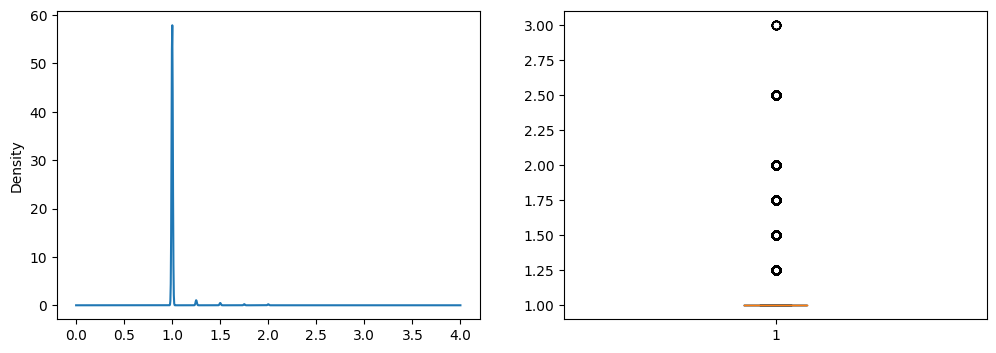

In [ ]:
# Melakukan Exploratory Data Analysis (EDA) untuk lebih mengenal data kita dan menemukan insights dari data.


# Univariate analysis surge_multiplier.
# Melihat distribusi dari surge_multiplier.
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['surge_multiplier'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['surge_multiplier'])
plt.show()

Dari hasil analisis data pada kolom surge_multiplier, didapatkan hasil berikut:
*   Dapat dilihat bahwa mean dan median dari surge_multiplier terpusat di sekitar nilai 1.00
*   Distribusinya hampir mirip dengan distribusi normal dan persebaran datanya merata.
*   Terdapat 6 outliers data yang bisa dilihat di boxplot.

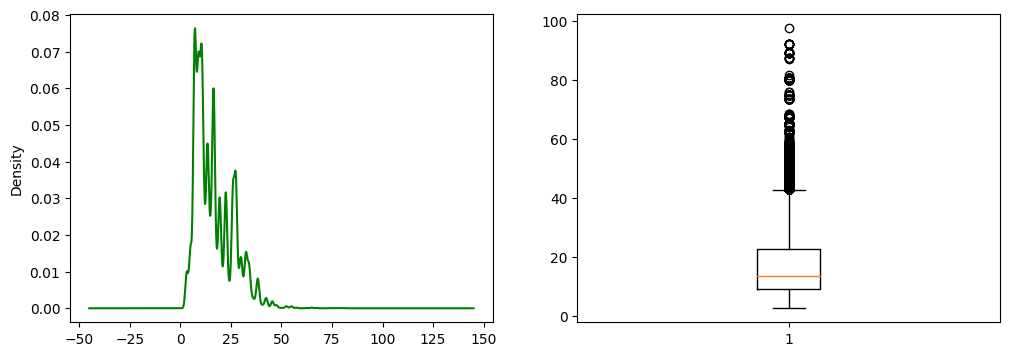

In [ ]:
# Univariate analysis price.
# Melihat distribusi dari price.
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['price'].plot(kind='kde', c='g')
f.add_subplot(1,2,2)
plt.boxplot(df['price'])
plt.show()

Dari hasil analisis data pada kolom price, didapatkan hasil berikut:
*   Dapat dilihat bahwa mean dan median dari surge_multiplier terpusat di sekitar nilai 10.
*   Distribusinya lebih ke right skew dan persebaran data kurang merata (memiliki standard deviasi yang tinggi).
*   Terdapat banyak outliers data yang bisa dilihat di boxplot.

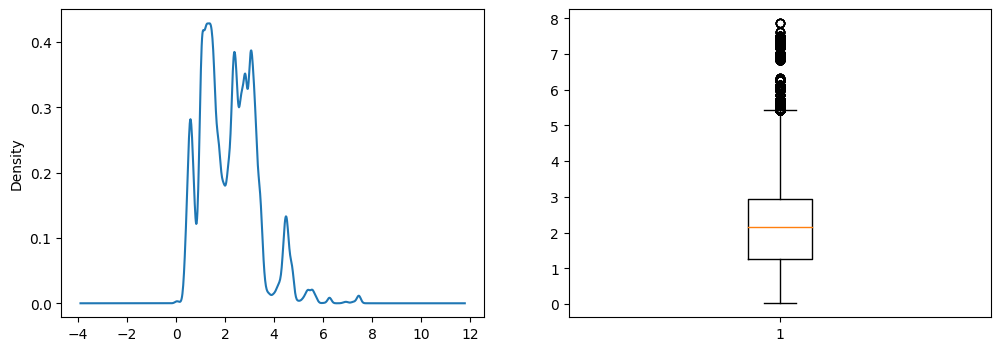

In [ ]:
# Univariate analysis distance.
# Melihat distribusi dari distance.
f = plt.figure(figsize=(12,4))
f.add_subplot(1,2,1)
df['distance'].plot(kind='kde')
f.add_subplot(1,2,2)
plt.boxplot(df['distance'])
plt.show()

*   Dapat dilihat bahwa mean dan median dari distance terpusat di sekitar nilai 2.
*   Distribusinya hampir mirip dengan distribusi normal dan persebaran datanya merata.
*   Terdapat banyak outliers data yang bisa dilihat di boxplot.





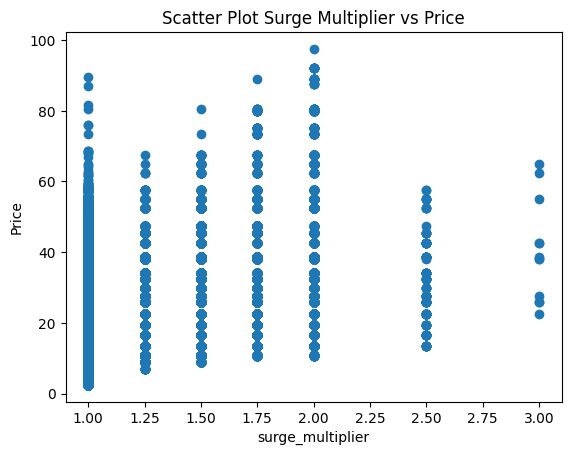

In [ ]:
# Bivariate analysis surge_multiplier dan price.
# Menggunakan scatter plot.
plt.scatter(df['surge_multiplier'], df['price'])
plt.xlabel('surge_multiplier')
plt.ylabel('Price')
plt.title('Scatter Plot Surge Multiplier vs Price')
plt.show()

Dari scatter plot dapat dilihat secara kasat mata bahwa surge_multiplier memiliki korelasi positif yang cukup signifikan terhadap price.
Hal ini berarti dengan bertambahnya nilai dari surge_multiplier maka nilai price pun akan bertambah.

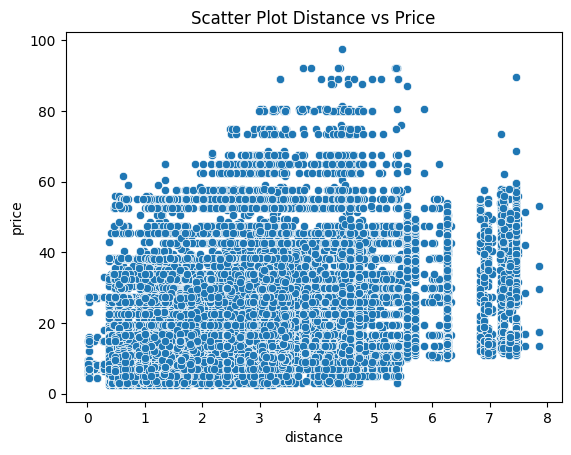

In [ ]:
# Bivariate analysis distance dan price.
# Menggunakan scatter plot.
sns.scatterplot(data=df, x='distance', y='price')
plt.title('Scatter Plot Distance vs Price')
plt.show()

Dari scatter plot dapat dilihat bahwa distance memiliki korelasi positif yang cukup signifikan terhadap price. Hal ini berarti dengan bertambahnya nilai dari distance maka nilai price pun akan bertambah.

In [ ]:
# Deskripsi variabel non numerik
df.describe(include = 'object')

,cab_type,product_id
count,637976,637976
unique,2,12
top,Uber,6f72dfc5-27f1-42e8-84db-ccc7a75f6969
freq,330568,55096


Karena terdapat nama product yang aneh maka kita akan memeriksa cabtypenya dan rename sesuai typenya.

In [ ]:
# Melihat jumlah dari masing-masing produk
df.product_id.value_counts()

6f72dfc5-27f1-42e8-84db-ccc7a75f6969    55096
9a0e7b09-b92b-4c41-9779-2ad22b4d779d    55096
6d318bcc-22a3-4af6-bddd-b409bfce1546    55096
6c84fd89-3f11-4782-9b50-97c468b19529    55095
55c66225-fbe7-4fd5-9072-eab1ece5e23e    55094
997acbb5-e102-41e1-b155-9df7de0a73f2    55091
lyft_premier                            51235
lyft                                    51235
lyft_luxsuv                             51235
lyft_plus                               51235
lyft_lux                                51235
lyft_line                               51233
Name: product_id, dtype: int64

In [ ]:
# Memeriksa product_id = 6f72dfc5-27f1-42e8-84db-ccc7a75f6969 termasuk dalam cab_type apa
df.query('product_id == "6f72dfc5-27f1-42e8-84db-ccc7a75f6969"').cab_type.value_counts()

Uber    55096
Name: cab_type, dtype: int64

Ternyata product_id yang berupa angka termasuk cabtype uber, selanjutnya kita akan merename id product tersebut agar lebih mudah dipahami.

In [ ]:
# rename product_id
df['product_id'] = df['product_id'].replace("6f72dfc5-27f1-42e8-84db-ccc7a75f6969", "uber_premier")
df['product_id'] = df['product_id'].replace("9a0e7b09-b92b-4c41-9779-2ad22b4d779d", "uber")
df['product_id'] = df['product_id'].replace("6d318bcc-22a3-4af6-bddd-b409bfce1546", "uber_luxsuv")
df['product_id'] = df['product_id'].replace("6c84fd89-3f11-4782-9b50-97c468b19529", "uber_plus")
df['product_id'] = df['product_id'].replace("55c66225-fbe7-4fd5-9072-eab1ece5e23e", "uber_lux")
df['product_id'] = df['product_id'].replace("997acbb5-e102-41e1-b155-9df7de0a73f2", "uber_line")

In [ ]:
df.tail(5)

,cab_type,product_id,price,surge_multiplier,distance
693065,Uber,uber,9.5,1.0,1.0
693066,Uber,uber_premier,13.0,1.0,1.0
693067,Uber,uber_lux,9.5,1.0,1.0
693069,Uber,uber_luxsuv,27.0,1.0,1.0
693070,Uber,uber_line,10.0,1.0,1.0


**Data Preprocessing**

Berdasarkan visualisasi data yang telah dilakukan dengan menggunakan boxplot, diketahui bahwa data yang digunakan banyak mengandung outlier, sehingga kali ini kita akan membuang outlier tersebut.

In [ ]:
# Menghapus baris yang mengandung outlier

q1 = df.quantile(0.25)
q3 = df.quantile(0.75)
iqr = q3 - q1
df = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]

<ipython-input-156-ed6d01a14358>:3: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q1 = df.quantile(0.25)
<ipython-input-156-ed6d01a14358>:4: FutureWarning: The default value of numeric_only in DataFrame.quantile is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  q3 = df.quantile(0.75)
<ipython-input-156-ed6d01a14358>:6: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df = df[~((df < (q1 - 1.5 * iqr)) | (df > (q3 + 1.5 * iqr))).any(axis=1)]


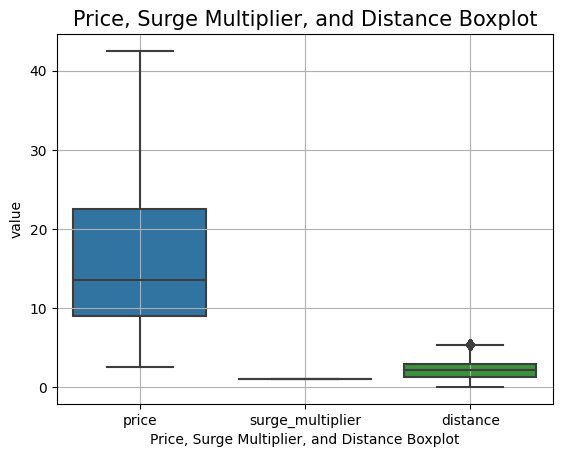

In [ ]:
# Memeriksa outlier melalui visualisasi data dengan boxplot
sns.boxplot(df[['price', 'surge_multiplier', 'distance']])
plt.figsize=(10, 8)
plt.title('Price, Surge Multiplier, and Distance Boxplot', size=15)
plt.ylabel('value', size=10)
plt.xlabel('Price, Surge Multiplier, and Distance Boxplot', size=10)
plt.grid(True)
plt.show()

Variabel-variabel yang dipilih sudah bebas dari outlier.

Terdapat dua variabel yang berupa cab_type dan product_id, sehingga kita perlu melakukan encoding agar data tersebut dapat diolah.

In [ ]:
# Dapatkan dummies dari beberapa variabel category
df = pd.get_dummies(df)
df.head()

,price,surge_multiplier,distance,cab_type_Lyft,cab_type_Uber,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,product_id_uber,product_id_uber_line,product_id_uber_lux,product_id_uber_luxsuv,product_id_uber_plus,product_id_uber_premier
0,5.0,1.0,0.44,1,0,0,1,0,0,0,0,0,0,0,0,0,0
1,11.0,1.0,0.44,1,0,0,0,0,0,0,1,0,0,0,0,0,0
2,7.0,1.0,0.44,1,0,1,0,0,0,0,0,0,0,0,0,0,0
3,26.0,1.0,0.44,1,0,0,0,0,1,0,0,0,0,0,0,0,0
4,9.0,1.0,0.44,1,0,0,0,0,0,1,0,0,0,0,0,0,0


Train and Test Data

In [ ]:
# Definisikan variabel x dan y
X = df.drop(columns = 'price')
y = df['price']

In [ ]:
# split data menjadi training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

**Pendefinisian Model**

Secara sederhana Linear Regression adalah salah satu algoritma yang digunakan untuk memprediksi nilai dari y dengan mengetahui nilai x dan menemukan nilai m (koefisien) dan b (intercept) yang errornya paling minimal.

In [ ]:
# Membuat object linear regression
model = LinearRegression()

**Pelatihan Model**

In [ ]:
# Training the model menggunakan training data yang sudah displit sebelumnya.
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Prediksi linear regression
y_pred = model.predict(X_test)

In [ ]:
print (X_test) #test dataset
print (y_pred) #predicted values

        surge_multiplier  distance  cab_type_Lyft  cab_type_Uber  \
470604               1.0      4.72              0              1   
611156               1.0      3.46              1              0   
103843               1.0      2.46              1              0   
660734               1.0      0.92              1              0   
203292               1.0      1.56              0              1   
...                  ...       ...            ...            ...   
353768               1.0      1.16              0              1   
360607               1.0      3.39              0              1   
177                  1.0      1.40              1              0   
474594               1.0      2.15              1              0   
67724                1.0      2.98              0              1   

        product_id_lyft  product_id_lyft_line  product_id_lyft_lux  \
470604                0                     0                    0   
611156                0                    

In [ ]:
# Nilai slope/koefisien (m) dan intercept (b).
print(model.coef_)
print(model.intercept_)

[  0.           2.71577811   0.40632256  -0.40632256  -7.34241007
 -10.62303853   5.53773971  14.24881509  -1.89339479   0.47861115
  -5.99998949  -6.9915226   -5.99905467  14.21760236   4.57234446
  -0.20570263]
10.318261435588541


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score
# The mean squared error
print("Mean squared error: %.2f"% mean_squared_error(y_test, y_pred))

Mean squared error: 4.69


In [ ]:
# Skor variasi yang dijelaskan bahwa 1 adalah prefect prediction
print('R2 score: %.4f' % r2_score(y_test, y_pred))

R2 score: 0.9369


hasil prediksi dari pelatihan model adalah 0.9376 yang mana sangat bagus dan mendekati nilai 1 (sempurna)

**Evaluasi Model**

In [ ]:
# Mencari tahu accuracy score dari model kita menggunakan testing data yang sudah displit sebelumnya.
model.score(X_test, y_test)
print('Accuracy score: %.4f' % model.score(X_test, y_test))

Accuracy score: 0.9369


Model yang telah dievaluasi mendapatkan nilai akurasi sebesar 93.76%
Artinya, hasil nilai akurasi dari latihan model dan evaluasi model sama.

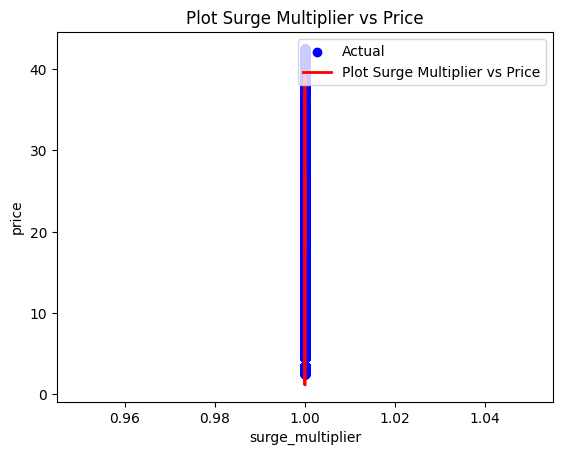

In [ ]:
# Visualisasi Regression Line menggunakan data testing.
y_pred = model.predict(X_test)

plt.scatter(X_test['surge_multiplier'], y_test, color='blue', label='Actual')
plt.plot(X_test['surge_multiplier'], y_pred, color='red', linewidth=2, label='Plot Surge Multiplier vs Price')
plt.xlabel('surge_multiplier')
plt.ylabel('price')
plt.legend(loc='upper right')
plt.title('Plot Surge Multiplier vs Price')
plt.show()

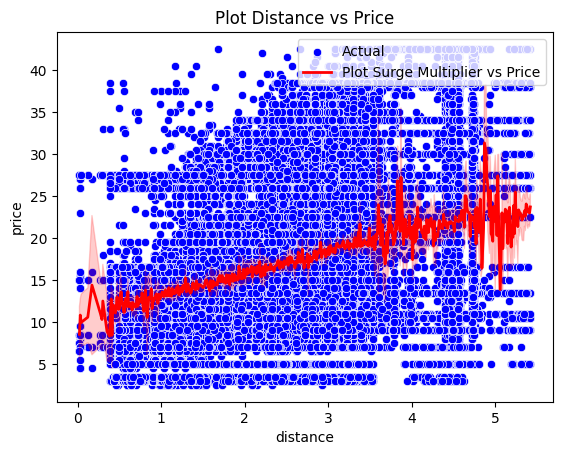

In [ ]:
# Visualisasi Regression Line menggunakan data testing.
sns.scatterplot(x=X_test['distance'], y=y_test, color='blue', label='Actual')
sns.lineplot(x=X_test['distance'], y=y_pred, color='red', linewidth=2, label='Plot Surge Multiplier vs Price')
plt.xlabel('distance')
plt.ylabel('price')
plt.legend(loc='upper right')
plt.title('Plot Distance vs Price')
plt.show()

In [ ]:
print(f'MAE dari model Linear Regression adalah {mean_absolute_error(y_test, y_pred)}')

MAE dari model Linear Regression adalah 1.6119175406026547


Hasil MAE (Mean Absolute Error) yang merupakan rata-rata selisih mutlak nilai sebenarnya (aktual) dengan nilai prediksi (peramalan) adalah sebesar 1.60, artinya rata-rata kesalahan absolut antara harga aktual dan prediksi harga adalah $1.60.




In [ ]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'MAPE dari model Linear Regression adalah {mape:.2f}%')

MAPE dari model Linear Regression adalah 0.13%


Hasil dari Mean Absolute Precentage Error (MAPE) yaitu pengukuran statistik tentang akurasi perkiraan (prediksi) pada metode peramalan adalah sebesar 0.13% hal ini menujukkan bahwa kemampuan model peramalan sangat baik (semakin kecil semakin baik).

In [ ]:
print(f'R2 dari model Linear Regression adalah {r2_score(y_test, y_pred)}')

R2 dari model Linear Regression adalah 0.9369114194341771


R squared menunjukkan seberapa besar variabel eksogen(X) mempengaruhi variabel endogen(Y). Nilai R2 sebesar 0.9376 menunjukkan bahwa X(surge_multiplier, distance, cab_type, dan product_id) dapat merepresentasikan Y(price) sebesar 93.76% sementara sisanya sebesar 6.24% dijelaskan oleh variabel lain diluar model.

**Model Inference**

In [ ]:
X_to_test = df.copy()

In [ ]:
X_to_test = X_to_test.drop(columns='price')

In [ ]:
to_inference = {'cab_type' : ['Lyft', 'Lyft'],
                'product_id' : ['lyft_premier', 'lyft_premier'],
                'distance' : [0.8, 0.9],
                'surge_multiplier' : [2, 1]}

In [ ]:
inference = pd.DataFrame(to_inference)

In [ ]:
inference = pd.get_dummies(inference)

In [ ]:
X_to_test = pd.concat([X_to_test, inference], ignore_index = True)

In [ ]:
X_to_test = X_to_test[-2:]
X_to_test

,surge_multiplier,distance,cab_type_Lyft,cab_type_Uber,product_id_lyft,product_id_lyft_line,product_id_lyft_lux,product_id_lyft_luxsuv,product_id_lyft_plus,product_id_lyft_premier,product_id_uber,product_id_uber_line,product_id_uber_lux,product_id_uber_luxsuv,product_id_uber_plus,product_id_uber_premier
608504,2.0,0.8,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN
608505,1.0,0.9,1,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
X_to_test = X_to_test.fillna(0)
print(X_to_test)

        surge_multiplier  distance  cab_type_Lyft  cab_type_Uber  \
608504               2.0       0.8              1            0.0   
608505               1.0       0.9              1            0.0   

        product_id_lyft  product_id_lyft_line  product_id_lyft_lux  \
608504              0.0                   0.0                  0.0   
608505              0.0                   0.0                  0.0   

        product_id_lyft_luxsuv  product_id_lyft_plus  product_id_lyft_premier  \
608504                     0.0                   0.0                        1   
608505                     0.0                   0.0                        1   

        product_id_uber  product_id_uber_line  product_id_uber_lux  \
608504              0.0                   0.0                  0.0   
608505              0.0                   0.0                  0.0   

        product_id_uber_luxsuv  product_id_uber_plus  product_id_uber_premier  
608504                     0.0                   

In [ ]:
price = model.predict(X_to_test)

In [ ]:
price

array([13.37581763, 13.64739544])

**Kesimpulan**

Berdasarkan hasil analisis data, dapat ditarik beberapa kesimpulan sebagai berikut:

*   Variabel surge_multiplier memiliki korelasi positif yang cukup signifikan terhadap variabel price. Artinya, semakin tinggi nilai surge_multiplier, semakin tinggi pula nilai price.

*   Variabel distance juga memiliki korelasi positif yang cukup signifikan terhadap variabel price. Hal ini menunjukkan bahwa semakin jauh jarak perjalanan, semakin tinggi pula harga yang harus dibayar.

*   Distribusi surge_multiplier hampir mirip dengan distribusi normal, sedangkan distribusi price cenderung right skewed (ekor panjang ke kanan). Variabel price juga memiliki persebaran data yang kurang merata dengan banyaknya outliers.

*   Prediksi harga menggunakan model yang telah dilatih memiliki nilai sebesar 0.9376, yang mendekati nilai 1. Hal ini menunjukkan bahwa model memiliki kinerja yang baik dan mendekati tingkat keakuratan yang sempurna.

*   Evaluasi model menunjukkan bahwa akurasi model sebesar 93.76%, yang artinya hasil prediksi dari model serupa dengan hasil aktual. Hal ini menunjukkan bahwa model tersebut dapat digunakan untuk melakukan prediksi harga dengan tingkat akurasi yang tinggi.

*   Mean Absolute Error (MAE) sebesar 1.60 menunjukkan rata-rata kesalahan absolut antara harga aktual dan prediksi sebesar $1.60. Semakin rendah nilai MAE, semakin akurat model dalam memprediksi harga.

*   Mean Absolute Percentage Error (MAPE) sebesar 0.13% menunjukkan tingkat akurasi yang sangat baik dalam memperkirakan harga. Semakin kecil nilai MAPE, semakin baik kemampuan model dalam melakukan peramalan.

*   Nilai R-squared sebesar 0.9376 menunjukkan bahwa variabel-variabel yang digunakan dalam model (surge_multiplier, distance, cab_type, dan product_id) dapat menjelaskan sebesar 93.76% variasi harga (price), sedangkan sisanya sebesar 6.24% dijelaskan oleh faktor lain di luar model.

Kesimpulan tersebut didasarkan pada analisis data yang dilakukan dan dapat memberikan gambaran tentang hubungan antara variabel-variabel yang diteliti dan prediksi harga dalam konteks layanan ridesharing Uber dan Lyft di Boston, MA.